# Python code um das Newtonfraktal zu veranschaulichem 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Wir benutzen das Newtonsverfahren bei unserem komplexen Polynom
### f(z) = z^5+z^2-z+1

In [2]:
def newton_method(z, max_iter=100, tol=1e-6):
    for i in range(max_iter):
        f_z = z**5 + z**2 - z + 1
        f_prime_z = 5*z**4 + 2*z - 1
        z_next = z - f_z / f_prime_z    # Newton's Method
        if abs(z_next - z) < tol:       # Break condition
            return z_next, i
        z = z_next
    return z, max_iter

### Nun brauchen wir noch eine Funktion, die das Newtonsverfahren auf jeden Punkt in der komplexen Ebene anwendet, um unser Fraktal zu erstellen

In [3]:
# xmin, xmax, ymin, ymax -> Is the range of the complex plane 
# width, height -> Is the resolution of the image.
def newton_fractal(xmin, xmax, ymin, ymax, width, height, max_iter=100, tol=1e-6):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    fractal = np.zeros((height, width, 3))  # Note: height, width to match image coordinates
    
    # Estimate roots using initial guesses
    initial_guesses = [complex(np.cos(2 * np.pi * i / 5), np.sin(2 * np.pi * i / 5)) for i in range(5)]
    roots = []
    for guess in initial_guesses:
        root, _ = newton_method(guess, max_iter, tol)
        if not any(np.isclose(root, r, atol=tol) for r in roots):
            roots.append(root)
    
    colors = [
        [1, 0, 0],  # Red
        [0, 1, 0],  # Green
        [0, 0, 1],  # Blue
        [1, 1, 0],  # Yellow
        [1, 0, 1]   # Magenta
    ]
    
    for i in range(width):
        for j in range(height):
            zx, zy = x[i], y[j]
            z = complex(zx, zy)
            root, iters = newton_method(z, max_iter, tol)
            
            for k in range(len(roots)):
                if abs(root - roots[k]) < tol:
                    color = colors[k]
                    break
            else:
                color = [0, 0, 0]  # Black for no convergence
            
            fractal[height - j - 1, i] = color  # Flip the y-coordinate
    
    return fractal

### Nun fehlt nur noch die Dimensionierungsgröße und das Plotten

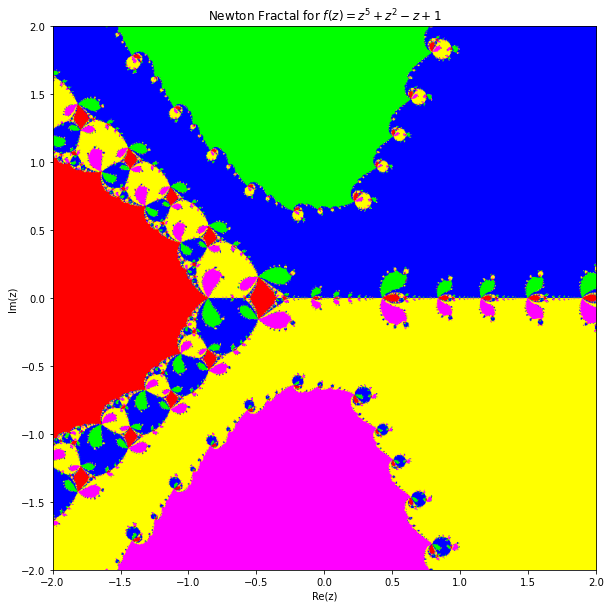

In [4]:
# xmin, xmax, ymin, ymax -> Is the range of the complex plane 
# width, height -> Is the resolution of the image.
xmin, xmax = -2, 2
ymin, ymax = -2, 2
width, height = 800, 800

# Calls newton_fractal() to generate the data needed for the fractal
fractal = newton_fractal(xmin, xmax, ymin, ymax, width, height)

plt.figure(figsize=(10, 10))
plt.imshow(fractal, extent=(xmin, xmax, ymin, ymax))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Newton Fractal for $f(z) = z^5 + z^2 - z + 1$')
plt.show()